In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 8.3.1


In [ ]:
#Open and display the image “dog.jpeg”.
#Convert the image in to numpy array,so that i can be   used in further processing.

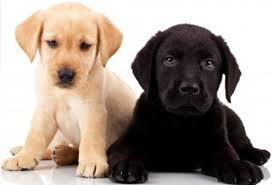

In [25]:
from IPython import display
image_Real=display.Image('dogs.jpeg')
image_Real

In [26]:
print(image.format)
#print(image.shape)
#print(image.mode)

jpeg


In [39]:
image=PIL.Image.open("dogs.jpeg")


In [44]:
wid, hgt = image.size
print(str(hgt) + "x" + str(wid))

185x272


In [ ]:
#Find out the dimensions of the image and convert it in to a two-dimensional array. 

In [81]:
# np_image = np.array(image)
# print(np_image.shape)


In [52]:
image_sequence = image.getdata()
image_array = np.array(image_sequence)

In [56]:
image_array.shape

(50320, 3)

In [64]:
# 3.Use kmeans clustering with k set to 3 and cluster the image.

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans=kmeans.fit_predict(image_array)

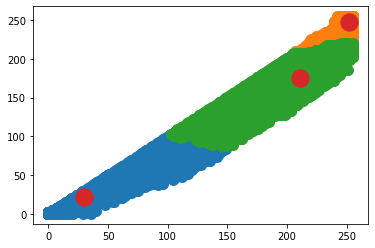

In [83]:
plt.scatter(image_array[y_kmeans == 0, 0], image_array[y_kmeans == 0, 1], s = 100)
plt.scatter(image_array[y_kmeans == 1, 0], image_array[y_kmeans == 1, 1], s = 100)
plt.scatter(image_array[y_kmeans == 2, 0], image_array[y_kmeans == 2, 1], s = 100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300)
plt.show()

In [67]:
kmeans.cluster_centers_

array([[ 29.54457989,  21.59875362,  20.45257749],
       [251.57755792, 247.71576397, 243.14542426],
       [210.58570727, 174.97364113, 143.95383104]])

In [73]:
import cv2
image = cv2.cvtColor(np_image, cv2.COLOR_BGR2RGB)

In [76]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)


(50320, 3)


In [77]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [78]:
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [79]:
centers = np.uint8(centers)

labels = labels.flatten()

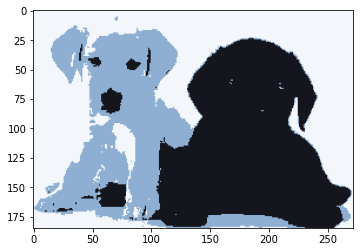

In [80]:
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

##### Dominant colours are light blue, black and grey